In [ ]:
import kagglehub


path = kagglehub.dataset_download("khairunneesa/depression-dataset-on-facial-ecpression-images")

print("Path to dataset files:", path)

100%|██████████| 8.32M/8.32M [00:00<00:00, 124MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/khairunneesa/depression-dataset-on-facial-ecpression-images/versions/1


In [ ]:
print(os.listdir(path))

organized_data_path = os.path.join(path, 'organized')



['Depression Data']


In [ ]:
import os

nested = os.path.join(path, 'Depression Data', 'data')
for root, dirs, files in os.walk(nested):
    print("Inside:", root)
    for d in dirs:
        print("  📁", d)
    for f in files[:5]:
        print("  📄", f)
    break


Inside: /root/.cache/kagglehub/datasets/khairunneesa/depression-dataset-on-facial-ecpression-images/versions/1/Depression Data/data
  📁 val
  📁 test
  📁 train


In [ ]:
train_dir = os.path.join(path, 'Depression Data', 'data', 'train')
val_dir = os.path.join(path, 'Depression Data', 'data', 'val')
test_dir = os.path.join(path, 'Depression Data', 'data', 'test')  # Optional for final testing


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height, img_width = 128, 128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary'
)


Found 3716 images belonging to 7 classes.
Found 388 images belonging to 7 classes.


In [ ]:
import os
import shutil
import kagglehub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 1: Download dataset
path = kagglehub.dataset_download("khairunneesa/depression-dataset-on-facial-ecpression-images")
print("Dataset downloaded at:", path)

# Step 2: Locate image folders
original_data_path = os.path.join(path, 'Depression Data', 'data')
subdirs = ['train', 'val', 'test']

# Step 3: Reorganize into binary folders
depressed_classes = ['sad', 'neutral']
binary_data_path = '/kaggle/working/binary_data'
os.makedirs(os.path.join(binary_data_path, 'depressed'), exist_ok=True)
os.makedirs(os.path.join(binary_data_path, 'non_depressed'), exist_ok=True)

for subdir in subdirs:
    subdir_path = os.path.join(original_data_path, subdir)
    for emotion_folder in os.listdir(subdir_path):
        emotion_folder_path = os.path.join(subdir_path, emotion_folder)
        if not os.path.isdir(emotion_folder_path):
            continue
        if emotion_folder.lower() in depressed_classes:
            target_folder = os.path.join(binary_data_path, 'depressed')
        else:
            target_folder = os.path.join(binary_data_path, 'non_depressed')
        for img_file in os.listdir(emotion_folder_path):
            src_file = os.path.join(emotion_folder_path, img_file)
            dst_file = os.path.join(target_folder, f"{subdir}_{emotion_folder}_{img_file}")
            if os.path.isfile(src_file):
                shutil.copy(src_file, dst_file)

# Step 4: Image generators
img_height, img_width = 128, 128
batch_size = 32
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(
    binary_data_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)
val_generator = datagen.flow_from_directory(
    binary_data_path,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Step 5: Build model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 6: Train
epochs = 10
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

Dataset downloaded at: /root/.cache/kagglehub/datasets/khairunneesa/depression-dataset-on-facial-ecpression-images/versions/1
Found 3594 images belonging to 2 classes.
Found 898 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,193 (12.60 MB)

 Trainable params: 3,304,193 (12.60 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.6601 - loss: 0.6641 - val_accuracy: 0.6759 - val_loss: 0.6217
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.6775 - loss: 0.6210 - val_accuracy: 0.6782 - val_loss: 0.6076
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.6830 - loss: 0.6044 - val_accuracy: 0.6882 - val_loss: 0.5921
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7007 - loss: 0.5788 - val_accuracy: 0.6759 - val_loss: 0.5902
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7030 - loss: 0.5762 - val_accuracy: 0.6893 - val_loss: 0.5633
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7270 - loss: 0.5437 - val_accuracy: 0.7149 - val_loss: 0.5364
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7435 - loss: 0.4993 - val_accuracy: 0.7416 - val_loss: 0.5183
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7545 - loss: 0.4979 - val_accu

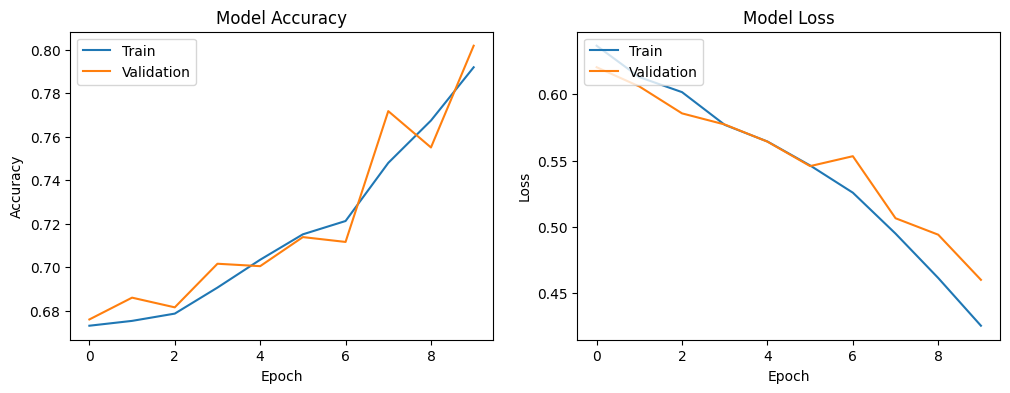

In [ ]:


# Step 7: Visualize Training History
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
# Example 1: Predicting on a single image
from tensorflow.keras.preprocessing import image
import numpy as np
import os # Import os module to list directory contents

# List files in the depressed directory to find an actual image
depressed_dir = '/kaggle/working/binary_data/depressed'
try:
    image_files = [f for f in os.listdir(depressed_dir) if os.path.isfile(os.path.join(depressed_dir, f))]
    if image_files:
        # Use the first found image file as an example
        img_filename = image_files[0]
        img_path = os.path.join(depressed_dir, img_filename)
        print(f"Using image file for prediction: {img_path}")
    else:
        print(f"No image files found in {depressed_dir}. Cannot run prediction example.")
        # You might want to skip the prediction step if no files are found
        img_path = None # Set to None if no image is found

except FileNotFoundError:
    print(f"Directory not found: {depressed_dir}. Please ensure the data reorganization step completed successfully.")
    img_path = None # Set to None if directory is not found


if img_path:
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_height, img_width), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
    img_array /= 255.0 # Rescale

    # Make prediction
    prediction = model.predict(img_array)

    # Interpret prediction (since it's binary classification with sigmoid)
    if prediction[0][0] > 0.5:
      predicted_class = 'depressed'
    else:
      predicted_class = 'non_depressed'

    print(f"The model predicts the image is: {predicted_class}")
    print(f"Prediction score: {prediction[0][0]}")

Using image file for prediction: /kaggle/working/binary_data/depressed/train_Sad_2538.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
The model predicts the image is: non_depressed
Prediction score: 0.2255076915025711


Saving anton 1.jpg to anton 1.jpg
User uploaded file "anton 1.jpg"


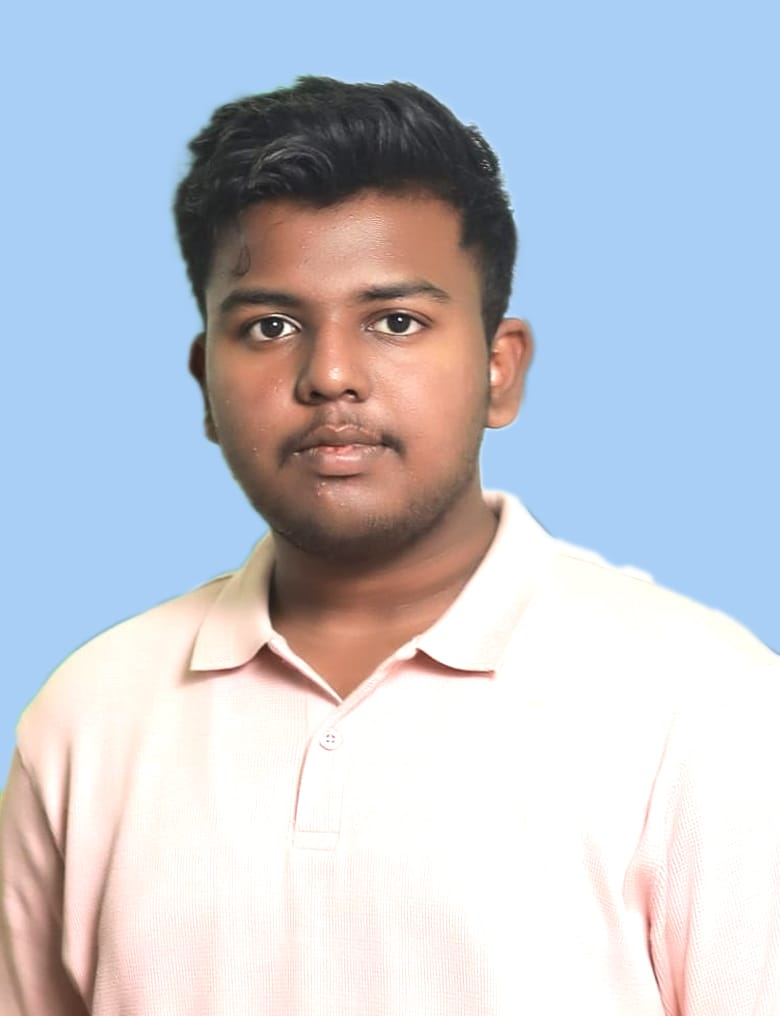

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

The model predicts the uploaded image is: non_depressed
Prediction score: 0.45306581258773804


In [ ]:
from google.colab import files
from IPython.display import display, Image

# Function to load and preprocess a user-uploaded image
def predict_uploaded_image(model, img_height, img_width):
    uploaded = files.upload()

    for filename in uploaded.keys():
        print(f'User uploaded file "{filename}"')

        try:
            # Display the uploaded image
            display(Image(filename))

            # Load and preprocess the image
            img = image.load_img(filename, target_size=(img_height, img_width), color_mode='grayscale')
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
            img_array /= 255.0 # Rescale

            # Make prediction
            prediction = model.predict(img_array)

            # Interpret prediction (since it's binary classification with sigmoid)
            if prediction[0][0] > 0.5:
              predicted_class = 'depressed'
            else:
              predicted_class = 'non_depressed'

            print(f"\nThe model predicts the uploaded image is: {predicted_class}")
            print(f"Prediction score: {prediction[0][0]}")

        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Call the function to allow the user to upload an image and get a prediction
predict_uploaded_image(model, img_height, img_width)

Saving YW4td2luZG93.jpg to YW4td2luZG93.jpg
User uploaded file "YW4td2luZG93.jpg"


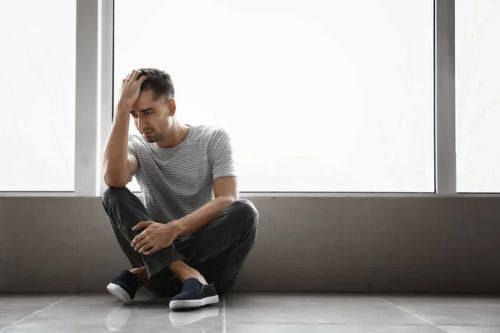

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step

The model predicts the uploaded image is: depressed
Prediction score: 0.8811787962913513


In [ ]:
predict_uploaded_image(model, img_height, img_width)